In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, roc_auc_score

In [2]:
import numpy as np
df = pd.read_csv("dataset.csv")
df.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

In [18]:
df.shape

(9709, 20)

In [20]:
#any missing values?
df.count()

ID                 9709
Gender             9709
Own_car            9709
Own_property       9709
Work_phone         9709
Phone              9709
Email              9709
Unemployed         9709
Num_children       9709
Num_family         9709
Account_length     9709
Total_income       9709
Age                9709
Years_employed     9709
Income_type        9709
Education_type     9709
Family_status      9709
Housing_type       9709
Occupation_type    9709
Target             9709
dtype: int64

In [21]:
#drop duplicates
df.drop_duplicates(inplace=True)
#check row count after dropping duplicates
df.count()

ID                 9709
Gender             9709
Own_car            9709
Own_property       9709
Work_phone         9709
Phone              9709
Email              9709
Unemployed         9709
Num_children       9709
Num_family         9709
Account_length     9709
Total_income       9709
Age                9709
Years_employed     9709
Income_type        9709
Education_type     9709
Family_status      9709
Housing_type       9709
Occupation_type    9709
Target             9709
dtype: int64

In [22]:
#check if any of the cells is blank or na
if df.isna().any().any():
    print("Datafrme containst blank cells (NA)")
else:
    print("Dataframe does not contain blank cells (NA)")

if df.isnull().any().any():
    print("Datafrme containst blank cells (Null)")
else:
    print("Dataframe does not contain blank cells (Null)")

Dataframe does not contain blank cells (NA)
Dataframe does not contain blank cells (Null)


Corrleation Matrix
                  Target    Gender   Own_car  Own_property  Unemployed  \
Target          1.000000  0.015033 -0.006787     -0.028227   -0.024926   
Gender          0.015033  1.000000  0.355420     -0.056067   -0.168753   
Own_car        -0.006787  0.355420  1.000000     -0.010190   -0.145493   
Own_property   -0.028227 -0.056067 -0.010190      1.000000    0.086675   
Unemployed     -0.024926 -0.168753 -0.145493      0.086675    1.000000   
Num_children    0.011715  0.054211  0.089565     -0.000480   -0.224611   
Num_family      0.007077  0.078460  0.138548      0.008782   -0.212479   
Account_length  0.077492 -0.008431  0.025058     -0.009627    0.005605   
Total_income    0.018784  0.200750  0.221874      0.025562   -0.166422   
Age            -0.043654 -0.173157 -0.127670      0.134602    0.617513   
Years_employed -0.009346 -0.028231  0.019096     -0.021443   -0.410936   

                Num_children  Num_family  Account_length  Total_income  \
Target            

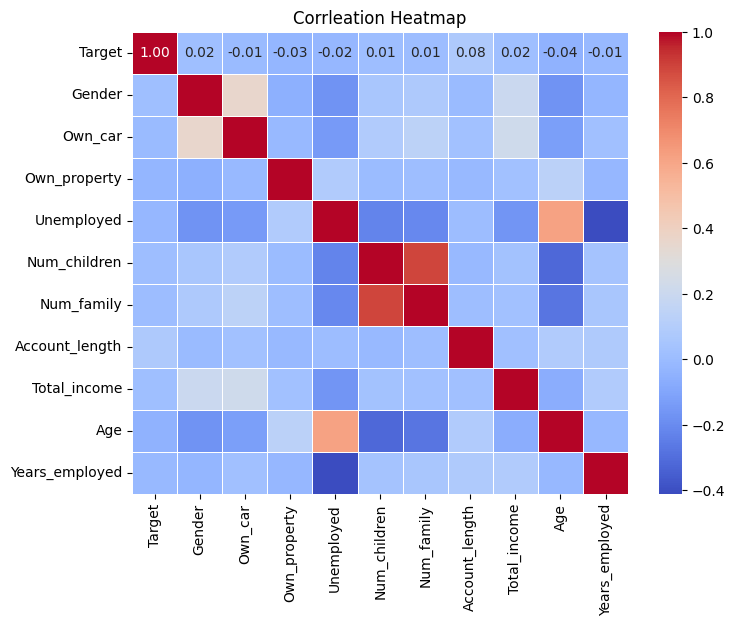


 Correlation Coefficients
Target vs Gender 0.02
Target vs Own_car -0.01
Target vs Own_property -0.03
Target vs Unemployed -0.02
Target vs Num_children 0.01
Target vs Num_family 0.01
Target vs Account_length 0.08
Target vs Total_income 0.02
Target vs Age -0.04
Target vs Years_employed -0.01


In [33]:
#import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import seaborn as sns
from scipy.stats import norm

#Calulate Correlation Matrix
subset_df = df[['Target','Gender', 'Own_car', 'Own_property', 'Unemployed', 'Num_children','Num_family','Account_length','Total_income','Age','Years_employed']]
correlation_matrix = subset_df.corr()
#print correlation matrix
print("Corrleation Matrix")
print (correlation_matrix)

#plot correlation heatmap
plt.figure(figsize=(8,6))
heatmap=sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f", linewidths=.5)

#heatmap.set_aspect('equal', adjustable ='box')

plt.title("Corrleation Heatmap")
plt.show()

# #Print Corrleation coefficients
print("\n Correlation Coefficients")
print("Target vs Gender", "{:.2f}".format(correlation_matrix.loc['Target', 'Gender']))
print("Target vs Own_car","{:.2f}".format (correlation_matrix.loc['Target', 'Own_car']))
print("Target vs Own_property", "{:.2f}".format(correlation_matrix.loc['Target', 'Own_property']))
print("Target vs Unemployed", "{:.2f}".format(correlation_matrix.loc['Target', 'Unemployed']))
print("Target vs Num_children", "{:.2f}".format(correlation_matrix.loc['Target', 'Num_children']))
print("Target vs Num_family", "{:.2f}".format(correlation_matrix.loc['Target', 'Num_family']))
print("Target vs Account_length", "{:.2f}".format(correlation_matrix.loc['Target', 'Account_length']))
print("Target vs Total_income", "{:.2f}".format(correlation_matrix.loc['Target', 'Total_income']))
print("Target vs Age", "{:.2f}".format(correlation_matrix.loc['Target', 'Age']))
print("Target vs Years_employed", "{:.2f}".format(correlation_matrix.loc['Target', 'Years_employed']))

1.0 to 0.8: Very strong positive correlation

0.8 to 0.6: Strong positive correlation

0.6 to 0.4: Moderate positive correlation

0.4 to 0.2: Weak positive correlation

0.2 to 0.0: Very weak positive correlation

0.0: No correlation

0.0 to -0.2: Very weak negative correlation

-0.2 to -0.4: Weak negative correlation

-0.4 to -0.6: Moderate negative correlation

-0.6 to -0.8: Strong negative correlation

-0.8 to -1.0: Very strong negative correlation

Shape of your Data Set loaded: (9709, 20)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  5
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  8
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    20 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['ID']
To fix these data quality issues in the dataset, import FixDQ

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
ID,int64,0.000000,100,5008804.000000,5150479.000000,Possible ID column: drop before modeling step.
Gender,int64,0.000000,0,0.000000,1.000000,No issue
Own_car,int64,0.000000,0,0.000000,1.000000,No issue
Own_property,int64,0.000000,0,0.000000,1.000000,No issue
Work_phone,int64,0.000000,0,0.000000,1.000000,No issue
Phone,int64,0.000000,0,0.000000,1.000000,No issue
Email,int64,0.000000,0,0.000000,1.000000,No issue
Unemployed,int64,0.000000,0,0.000000,1.000000,No issue
Num_children,int64,0.000000,0,0.000000,19.000000,Column has 152 outliers greater than upper bound (2.50) or lower than lower bound(-1.50). Cap them or remove them.
Num_family,int64,0.000000,0,1.000000,20.000000,"Column has 142 outliers greater than upper bound (4.50) or lower than lower bound(0.50). Cap them or remove them., Column has a high correlation with ['Num_children']. Consider dropping one of them."


Number of All Scatter Plots = 6


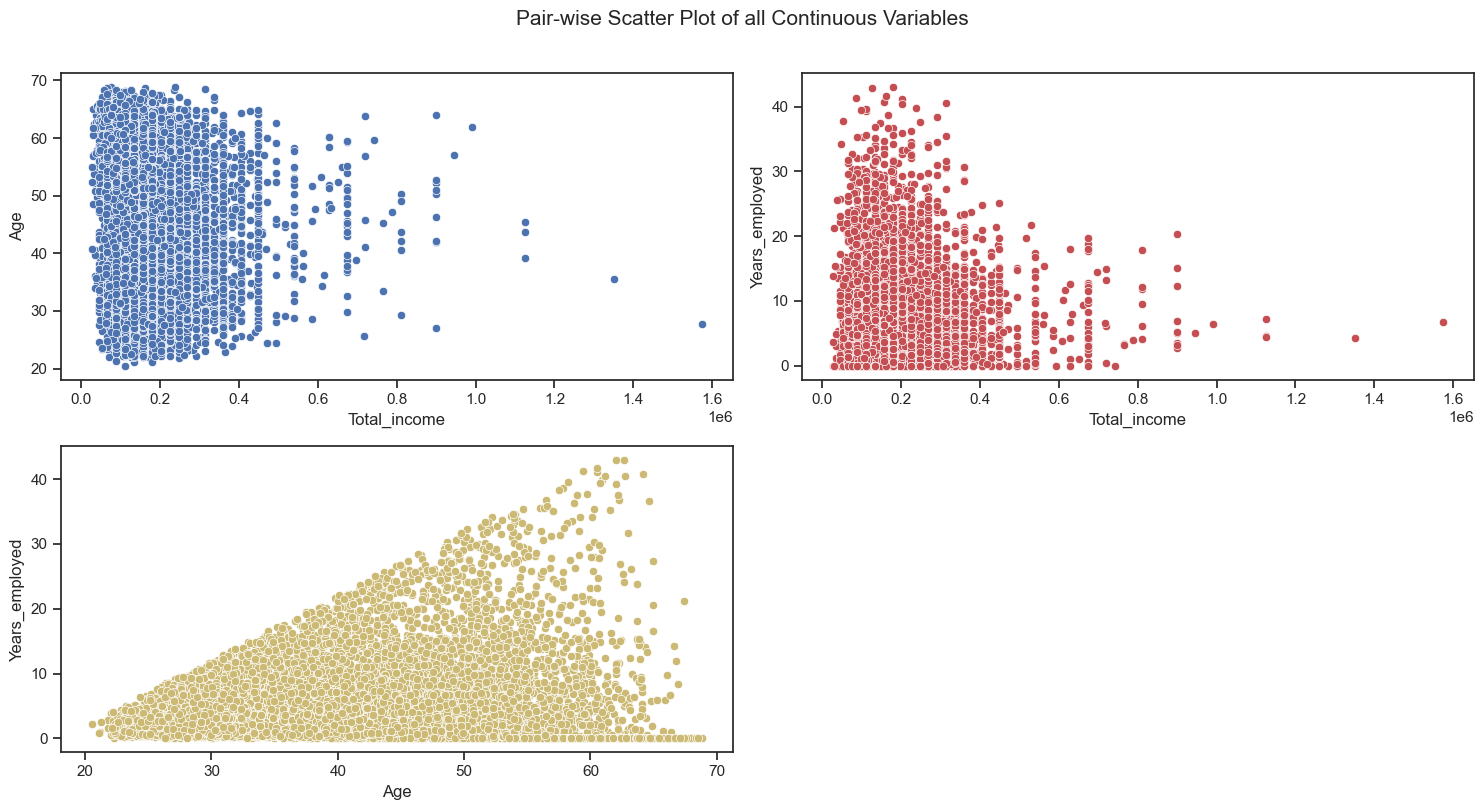

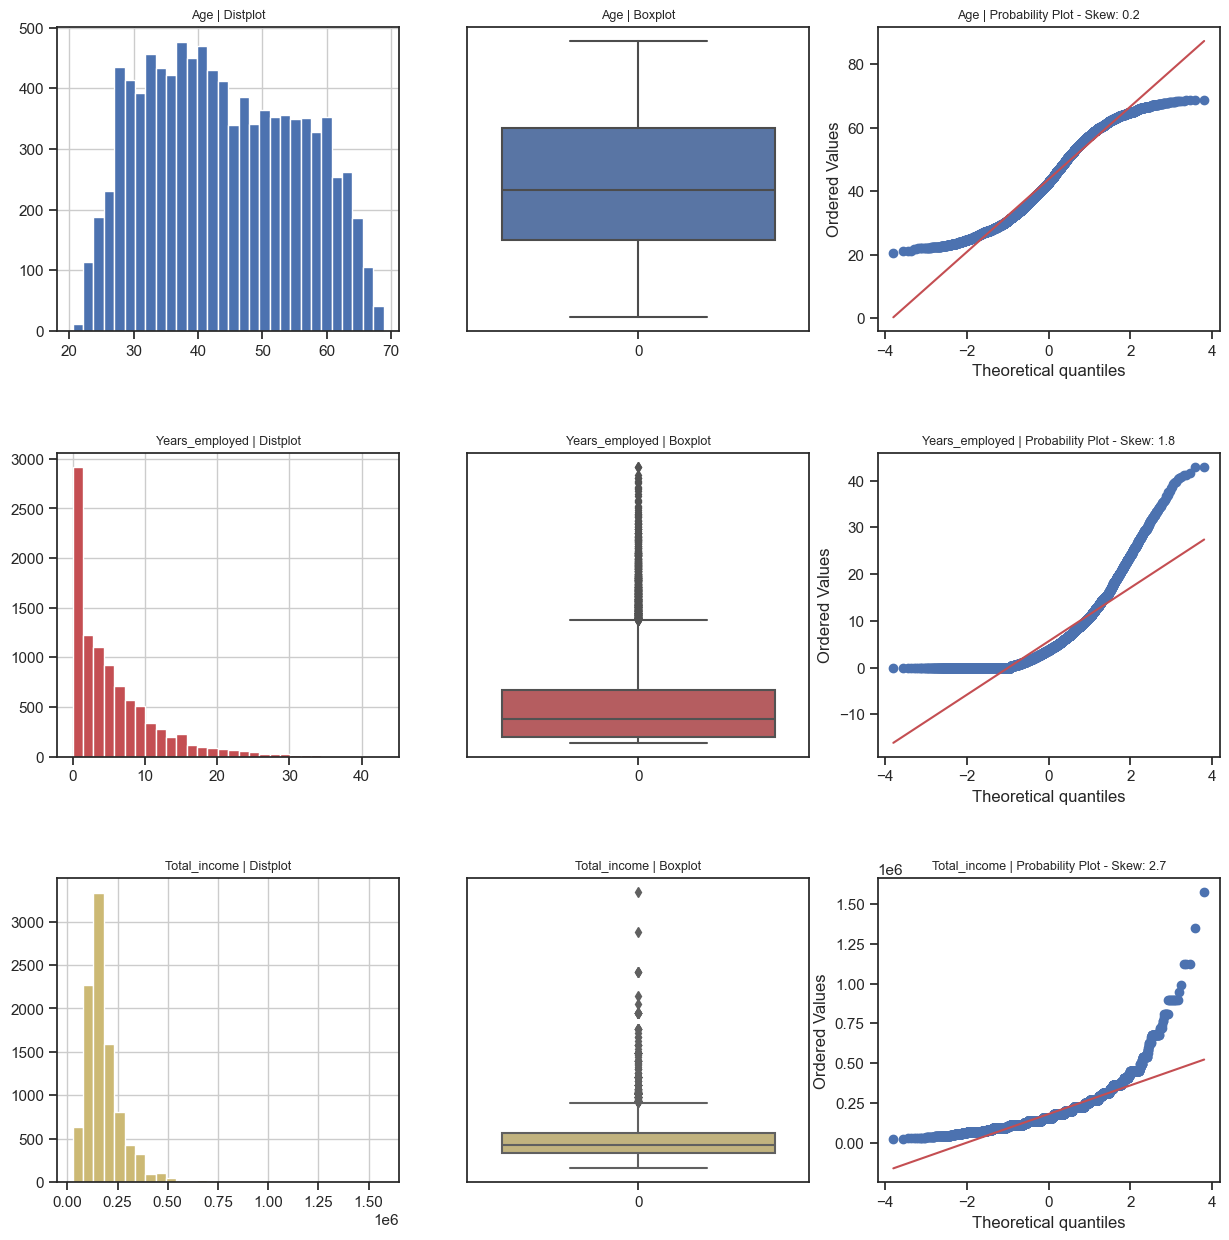

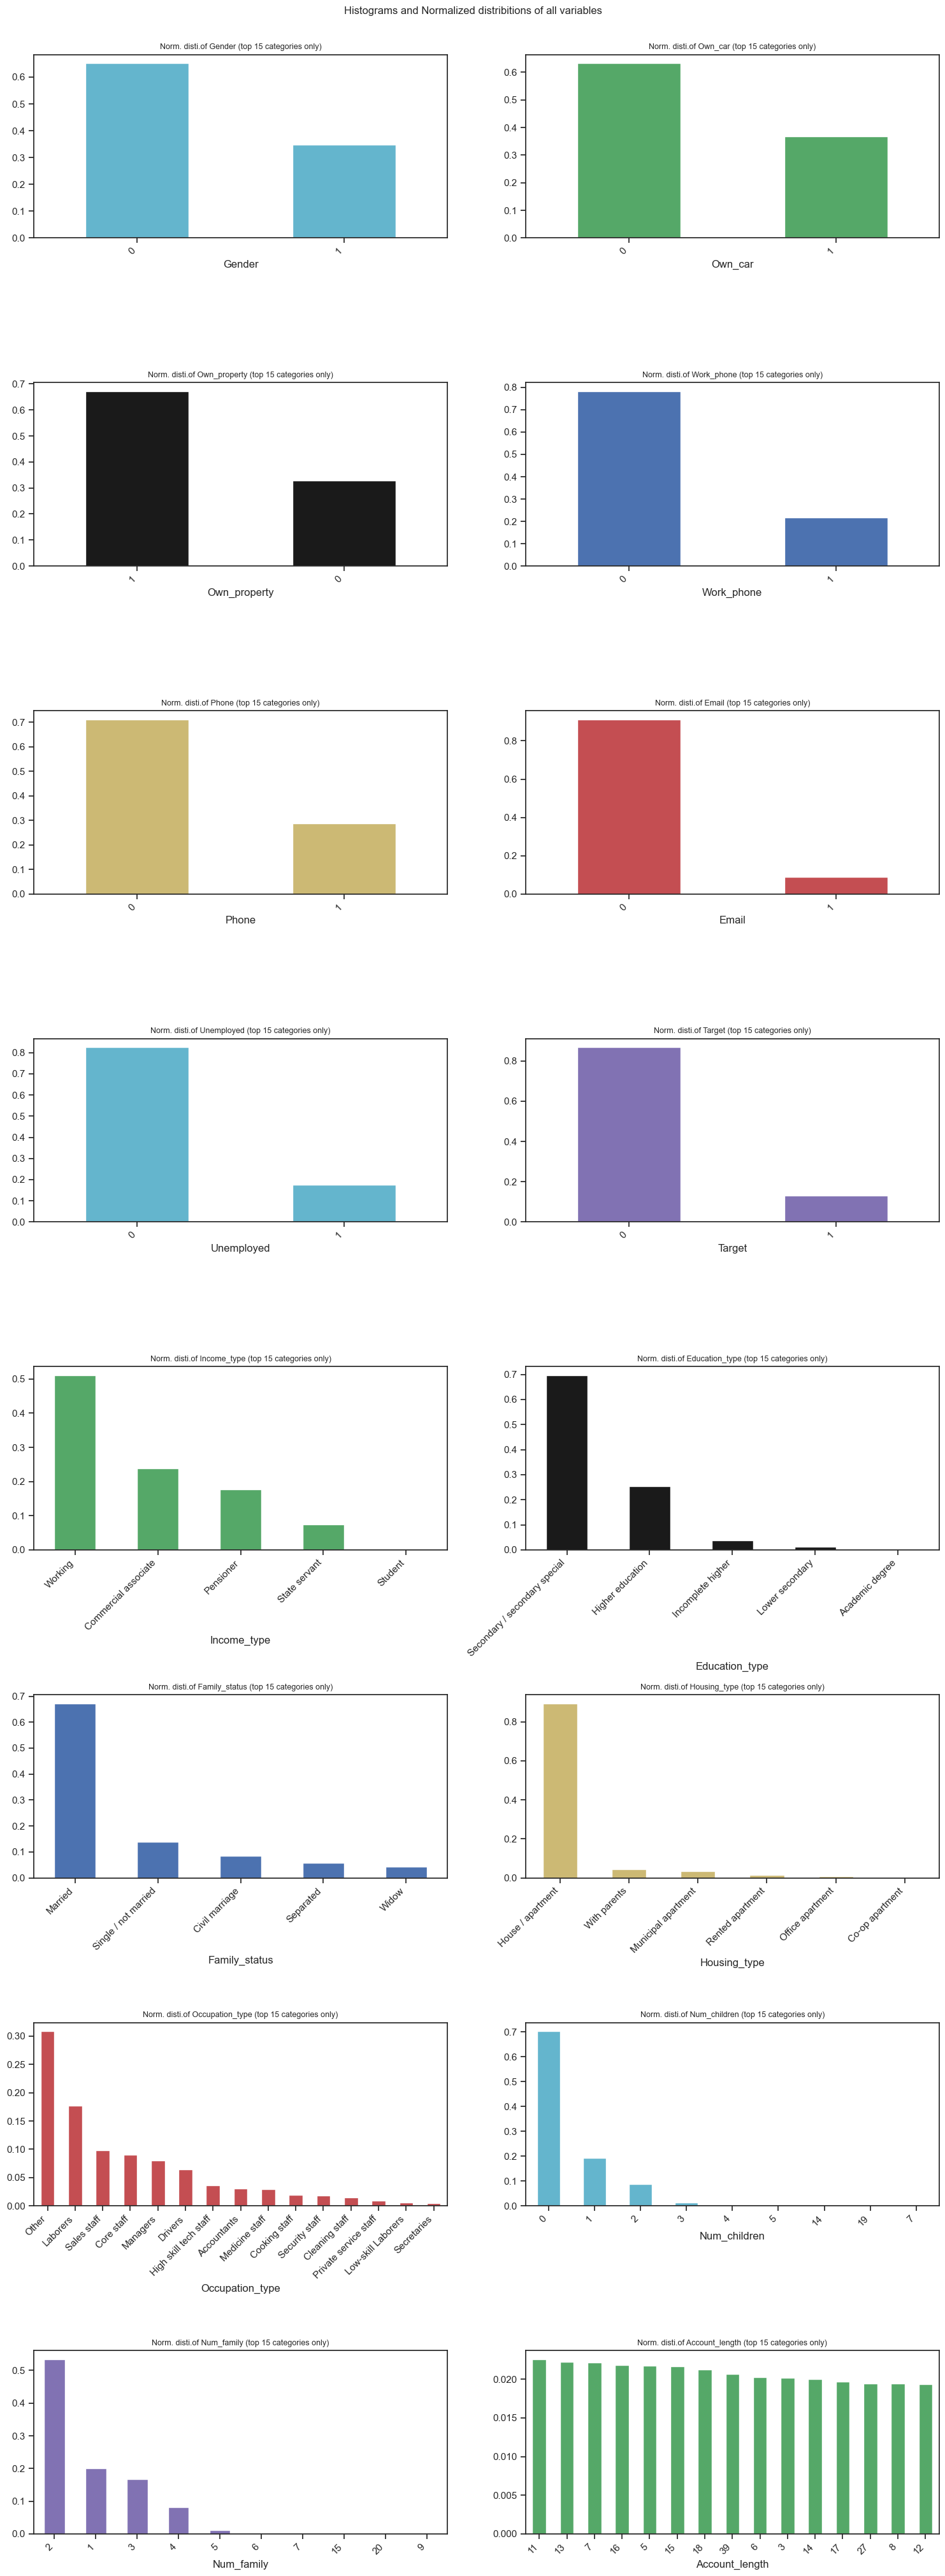

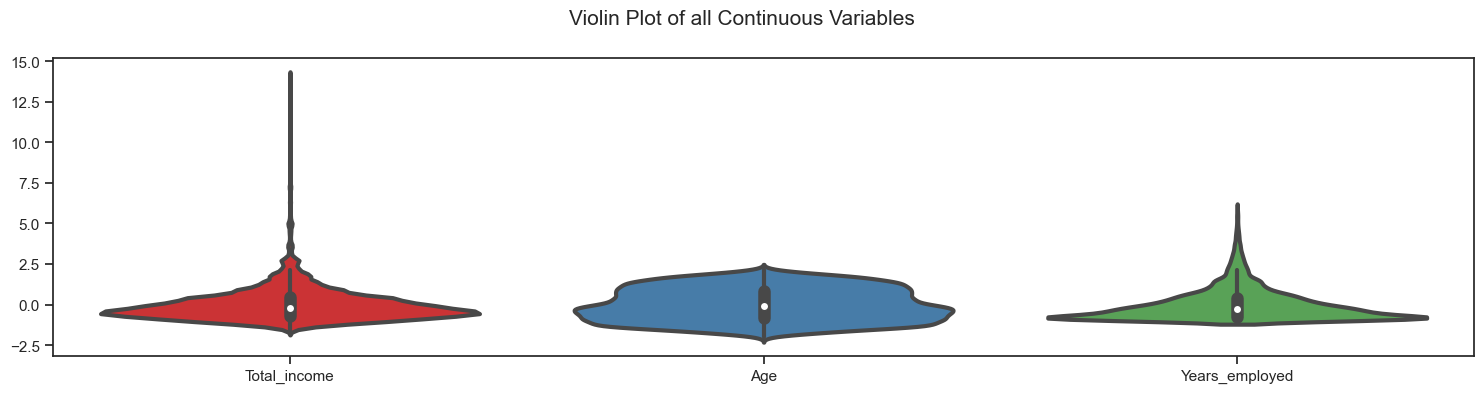

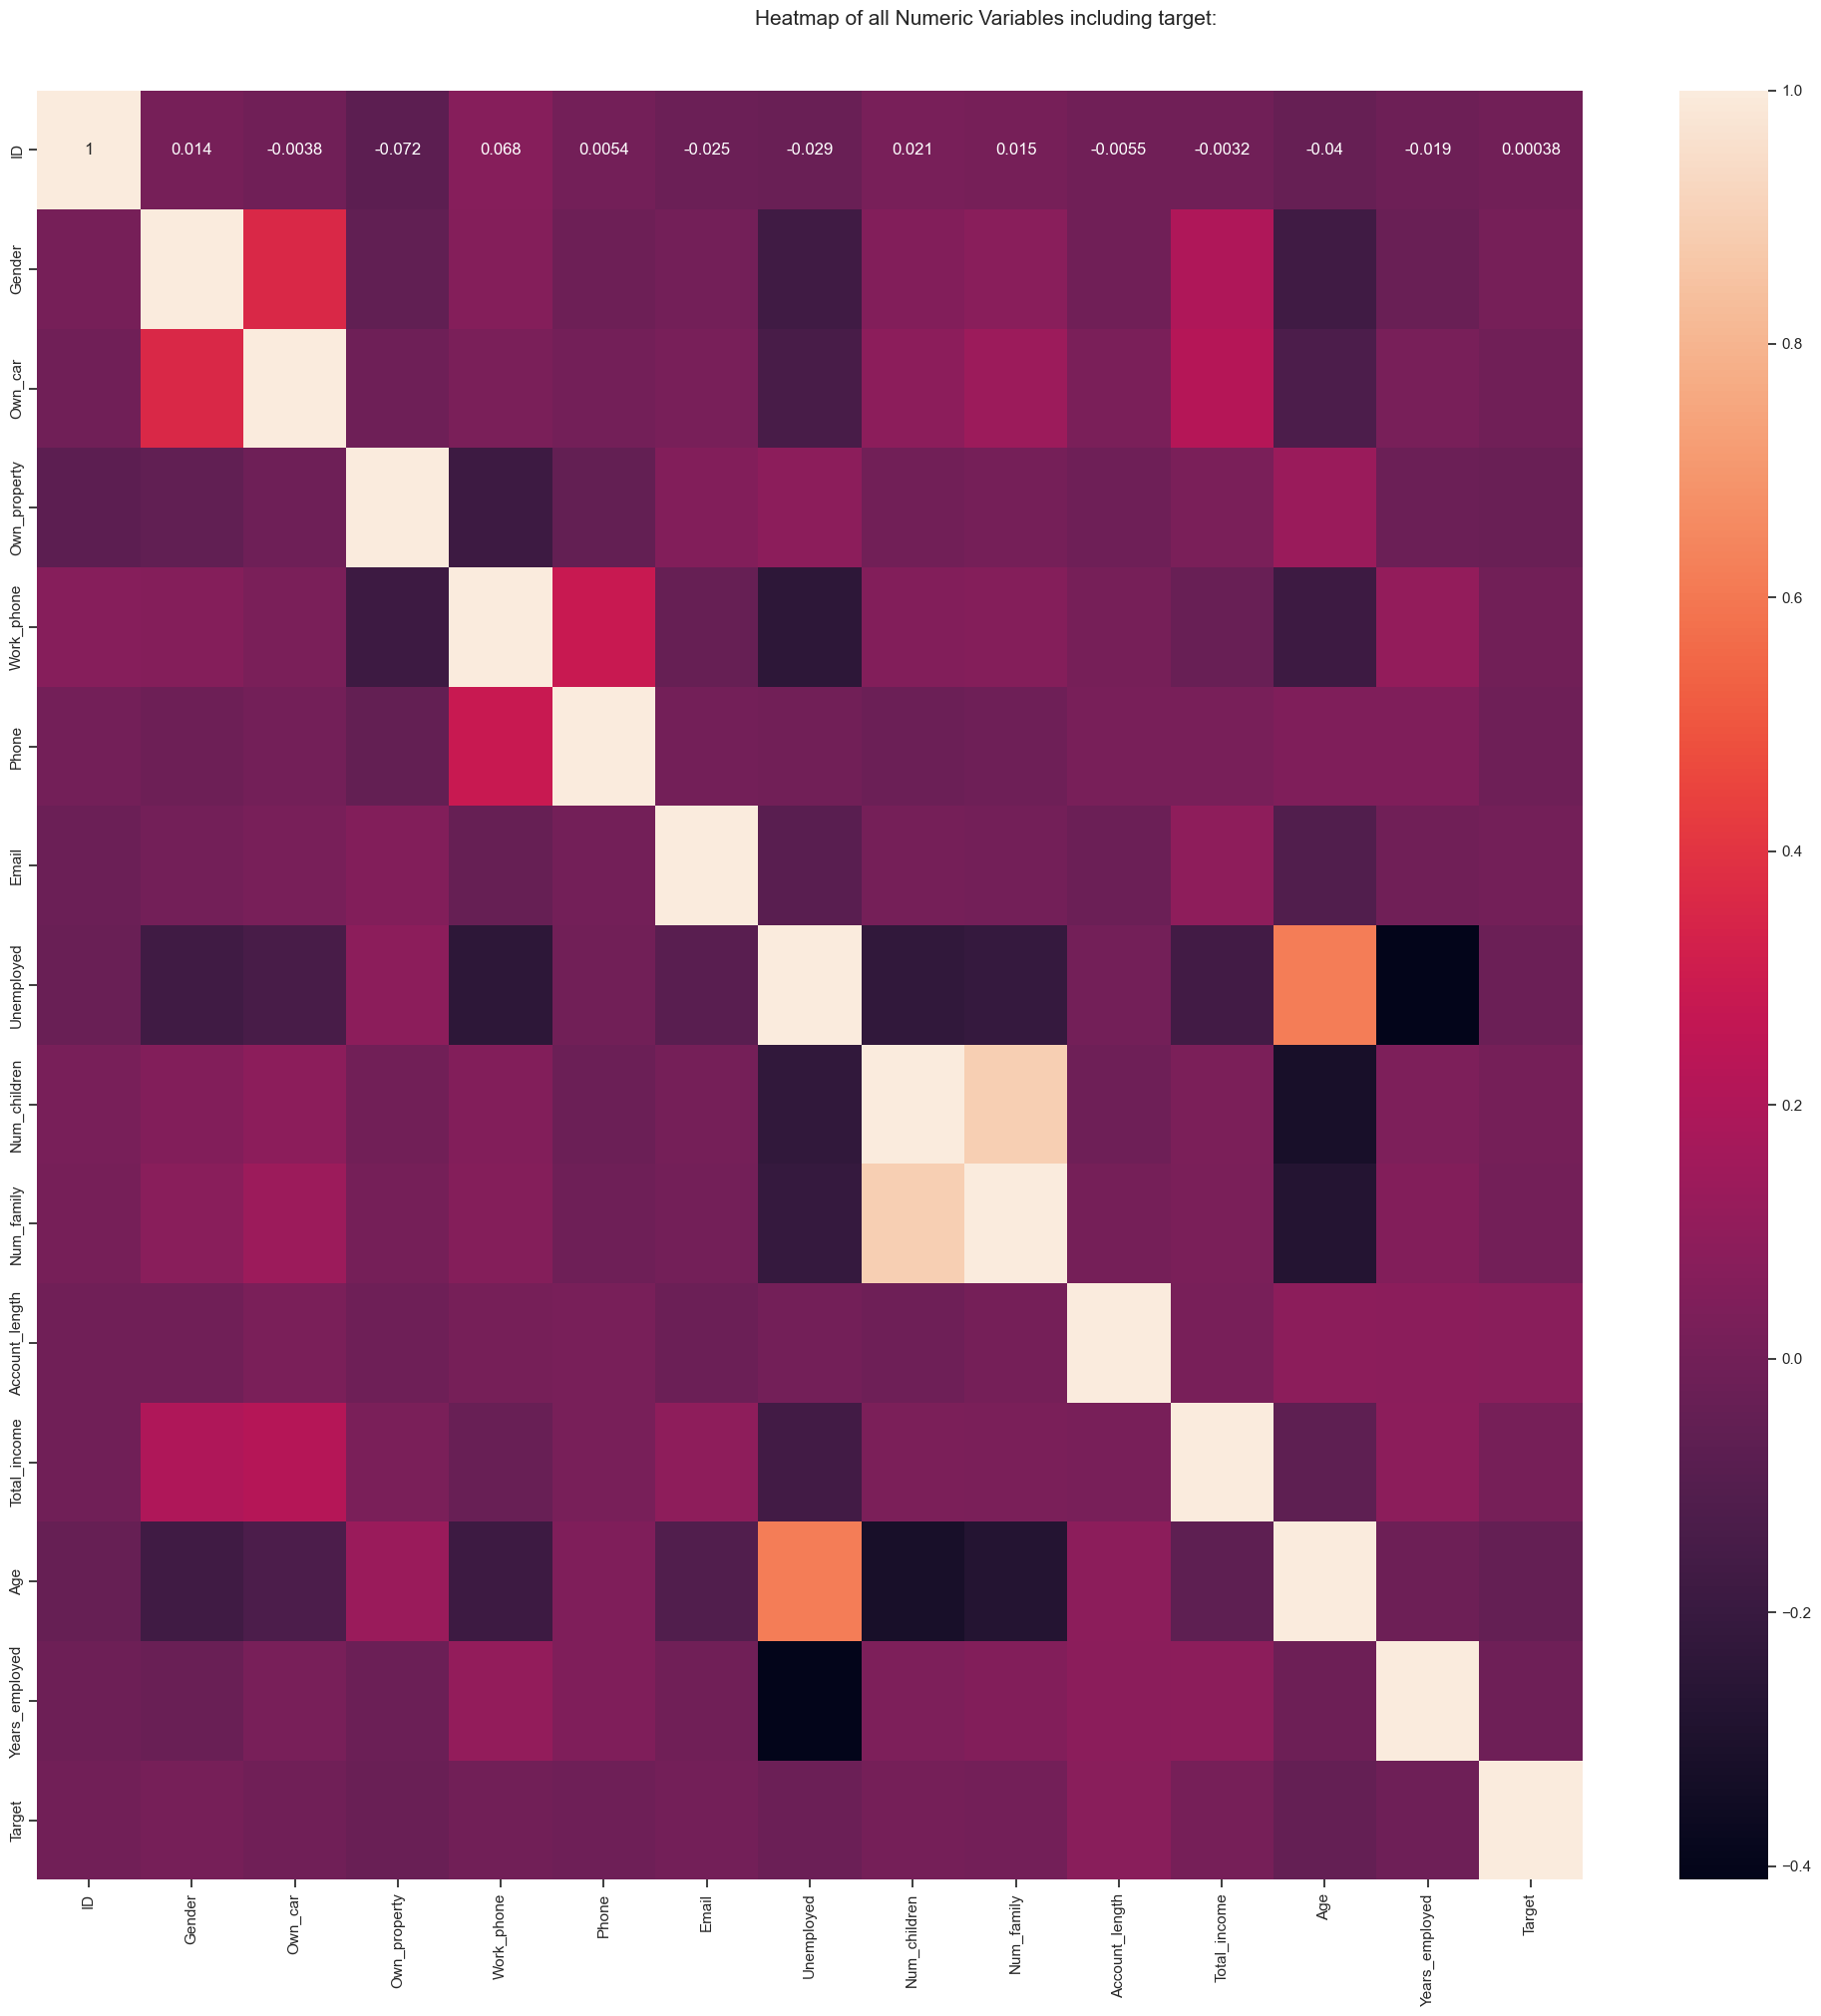

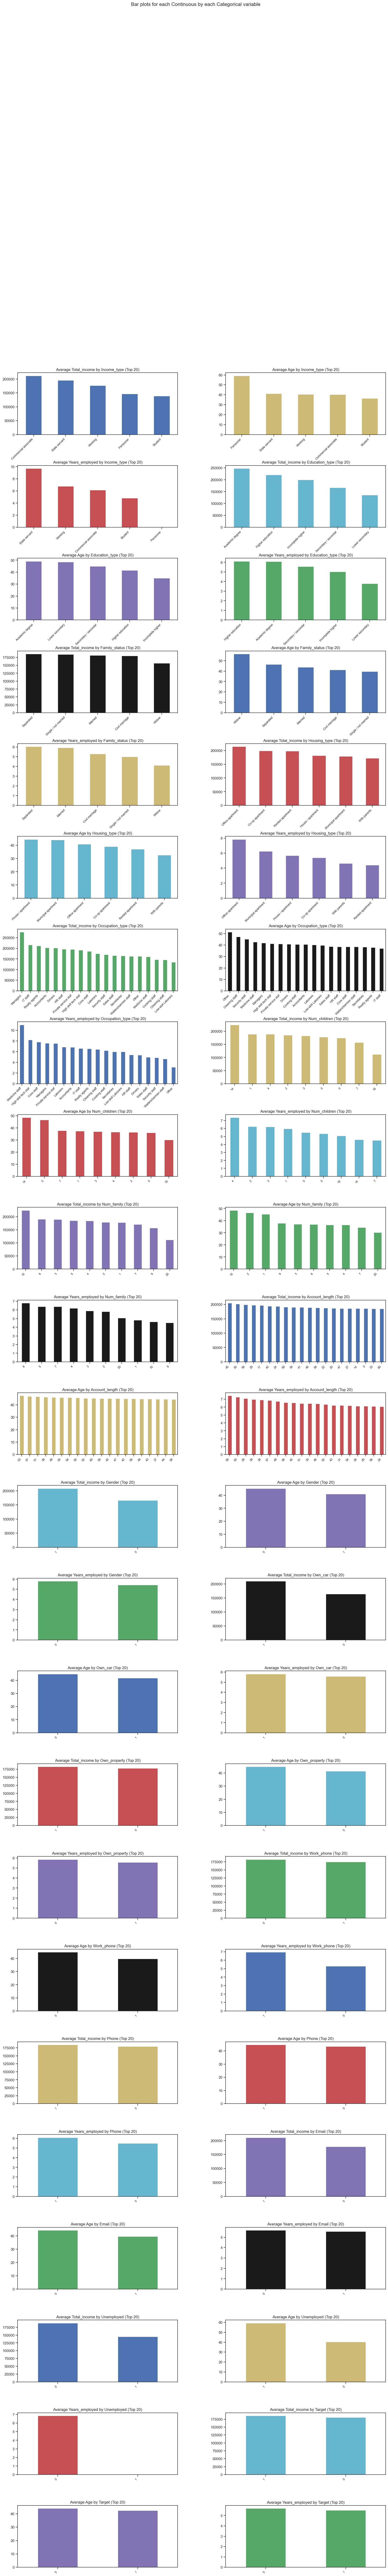

All Plots done
Time to run AutoViz = 8 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [38]:
#%matplotlib inline
import os
from autoviz.AutoViz_Class import AutoViz_Class
# Define the AutoViz class
AV = AutoViz_Class()

# Path to the dataset
#dataset_path = '/kaggle/input/credit-card-eligibility-data-determining-factors/dataset.csv'
dataset_path = 'dataset.csv'
# Generate visualizations
dft = AV.AutoViz(dataset_path)

# # Save visualizations
# def save_current_figure(fig, filename):
#     if not os.path.exists('plots'):
#         os.makedirs('plots')
#     fig.savefig(os.path.join('plots', filename))

# # Example: Save current figure (you might need to iterate over all figures if multiple are generated)
# fig = plt.gcf()  # Get the current figure
# save_current_figure(fig, 'autoviz_output.png')

# # Display saved images
# from IPython.display import Image, display

# def display_saved_images(image_folder='plots'):
#     images = os.listdir(image_folder)
#     for image in images:
#         display(Image(filename=os.path.join(image_folder, image)))

# # Display the saved images
# display_saved_images()

In [ ]:
# AutoViz for all columns
# %matplotlib inline
# _ = AV.AutoViz(dataset_path)

Shape of your Data Set loaded: (9709, 7)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  3
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    7 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
There are 50 dupl

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Gender,int64,0.000000,0,0.000000,1.000000,No issue
Unemployed,int64,0.000000,0,0.000000,1.000000,No issue
Num_children,int64,0.000000,0,0.000000,19.000000,Column has 150 outliers greater than upper bound (2.50) or lower than lower bound(-1.50). Cap them or remove them.
Num_family,int64,0.000000,0,1.000000,20.000000,"Column has 140 outliers greater than upper bound (4.50) or lower than lower bound(0.50). Cap them or remove them., Column has a high correlation with ['Num_children']. Consider dropping one of them."
Age,float64,0.000000,NA,20.504186,68.863837,No issue
Total_income,float64,0.000000,NA,27000.000000,1575000.000000,Column has 318 outliers greater than upper bound (393750.00) or lower than lower bound(-56250.00). Cap them or remove them.
Target,int64,0.000000,0,0.000000,1.000000,No issue


Number of All Scatter Plots = 3


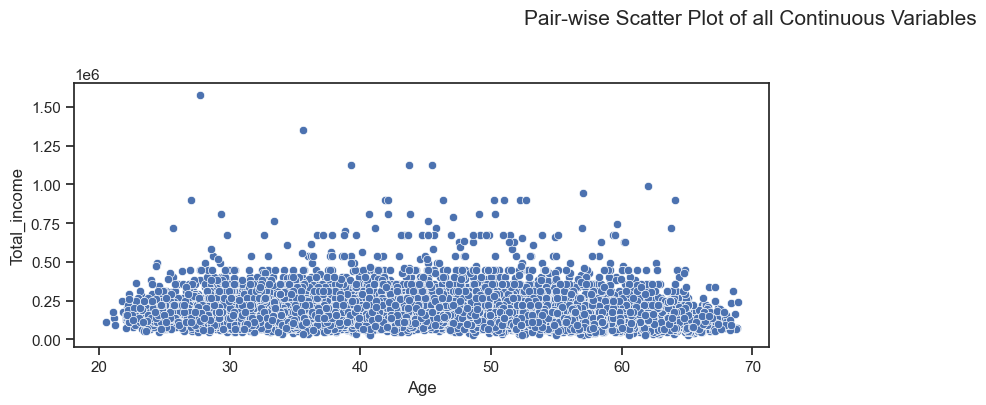

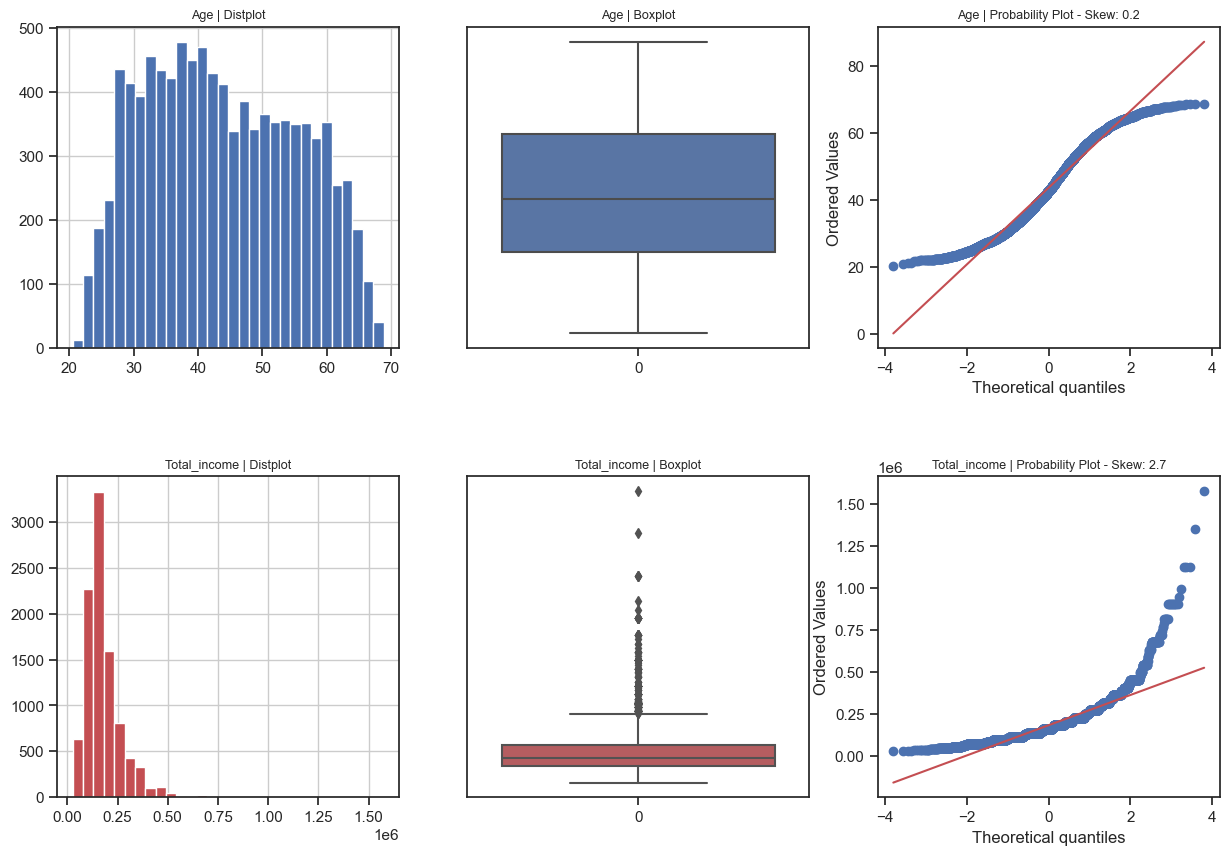

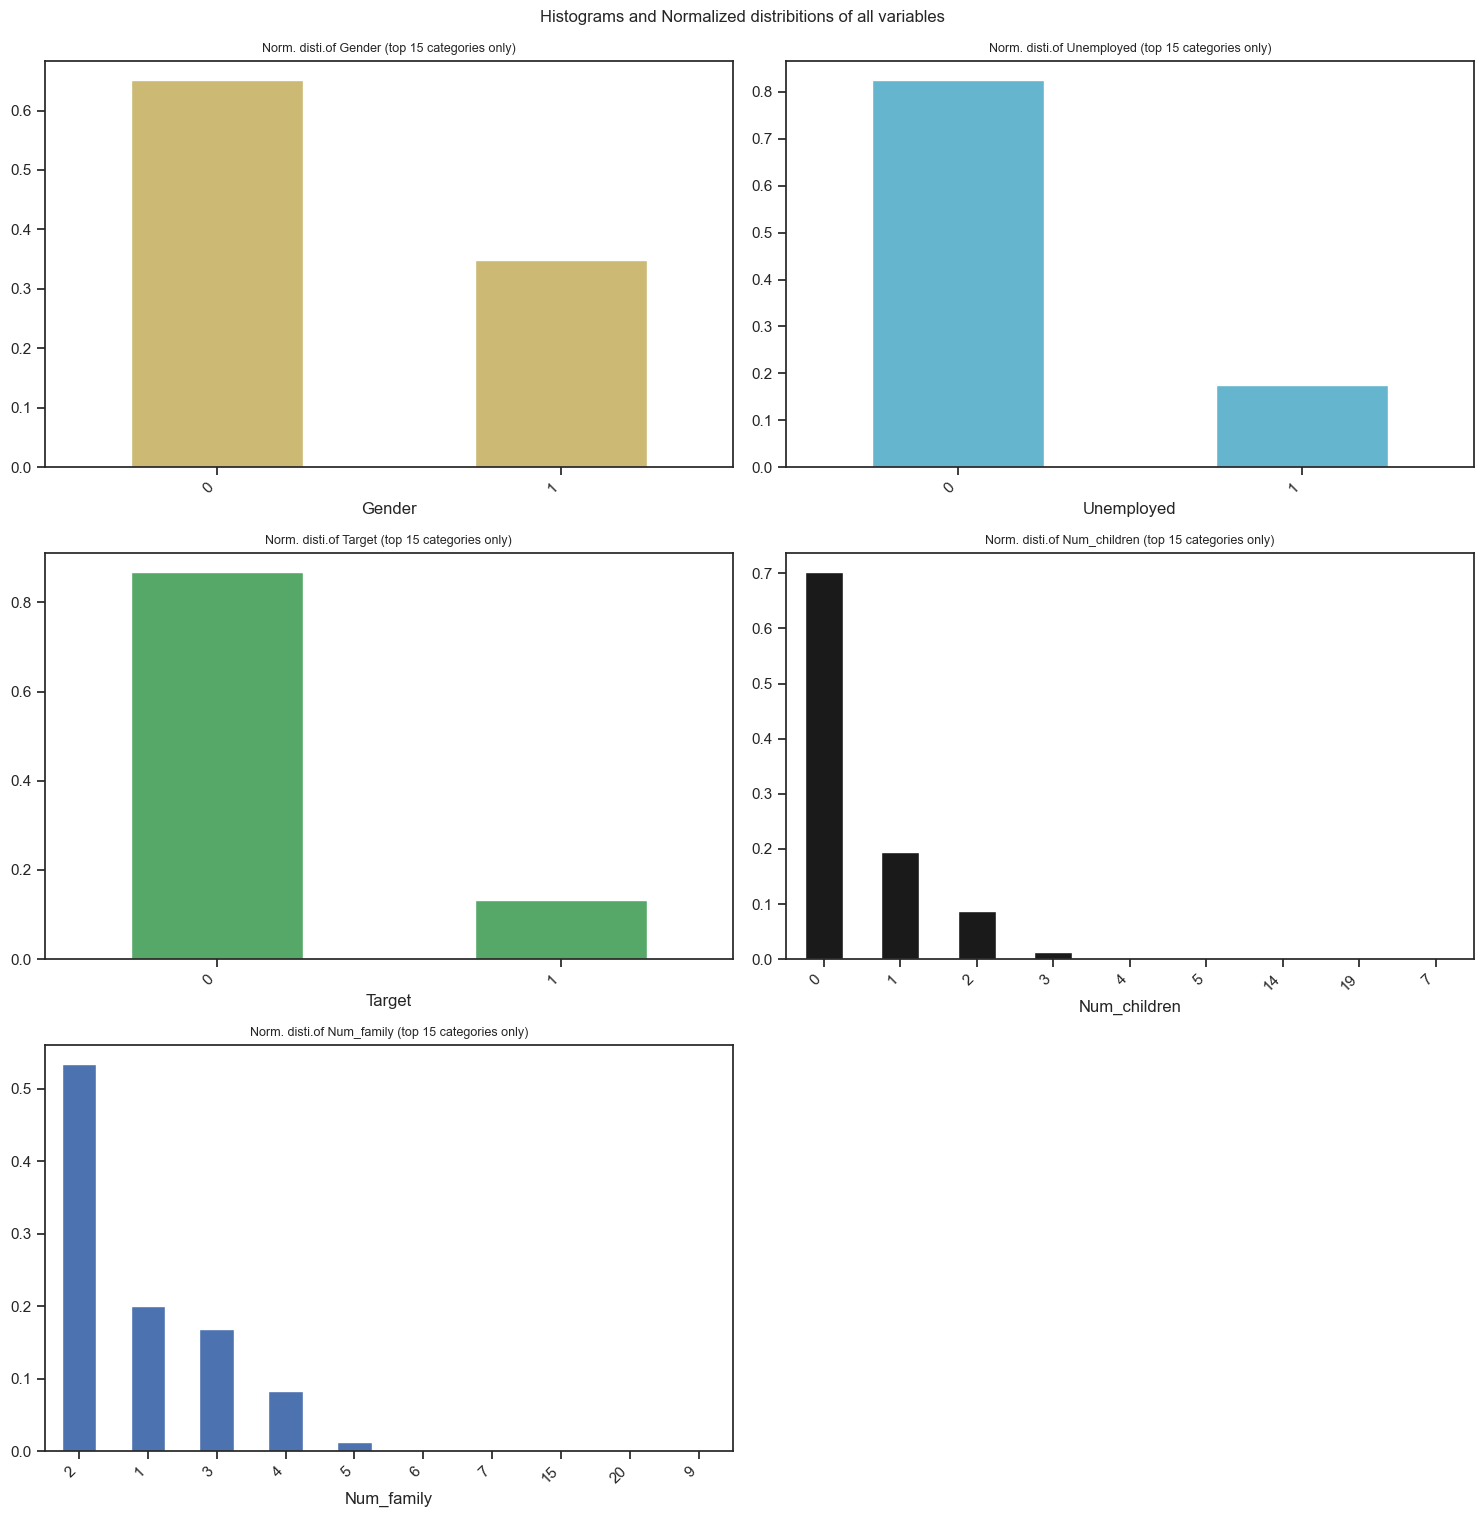

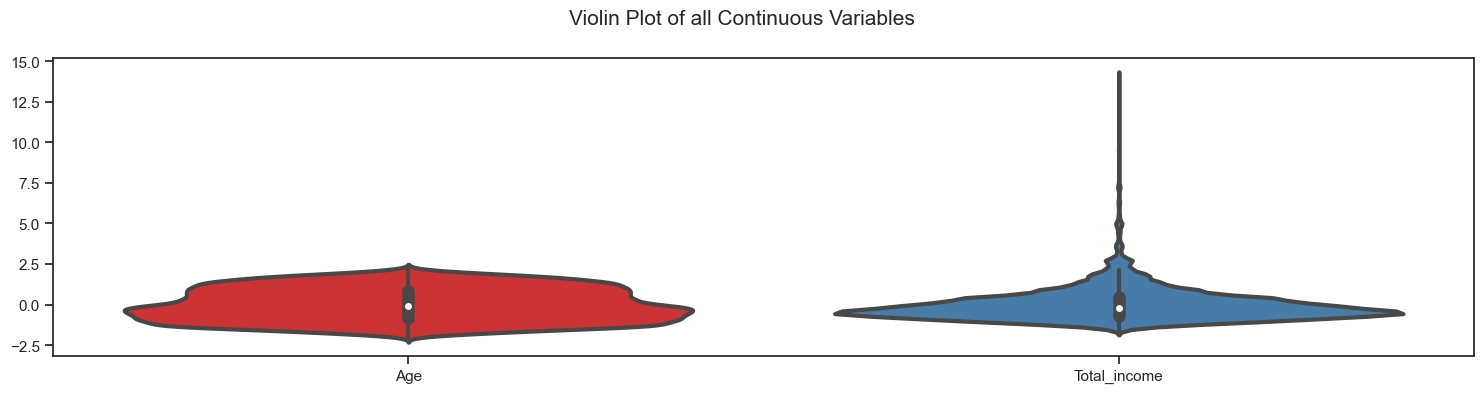

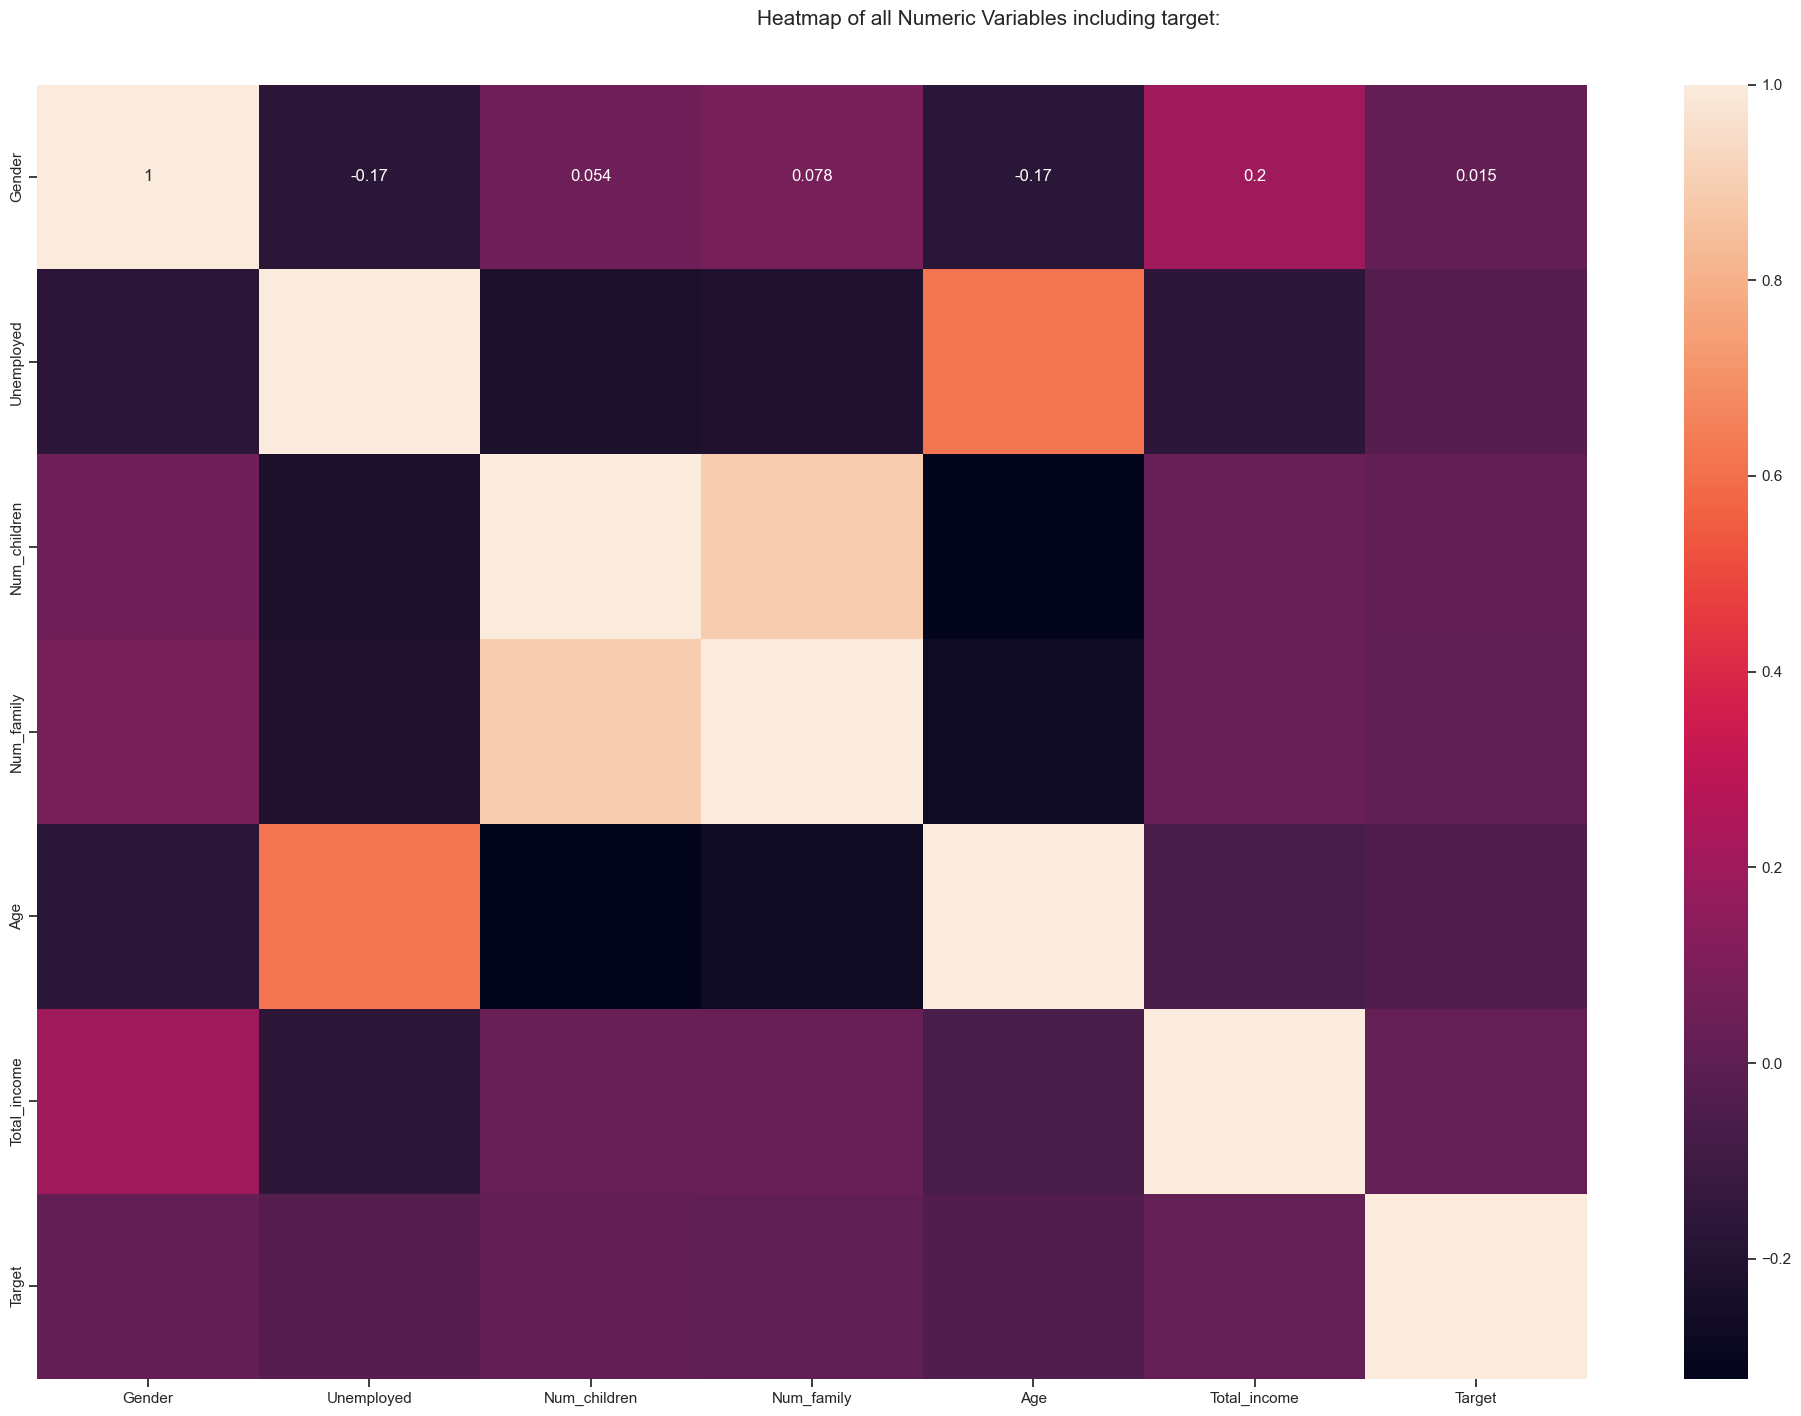

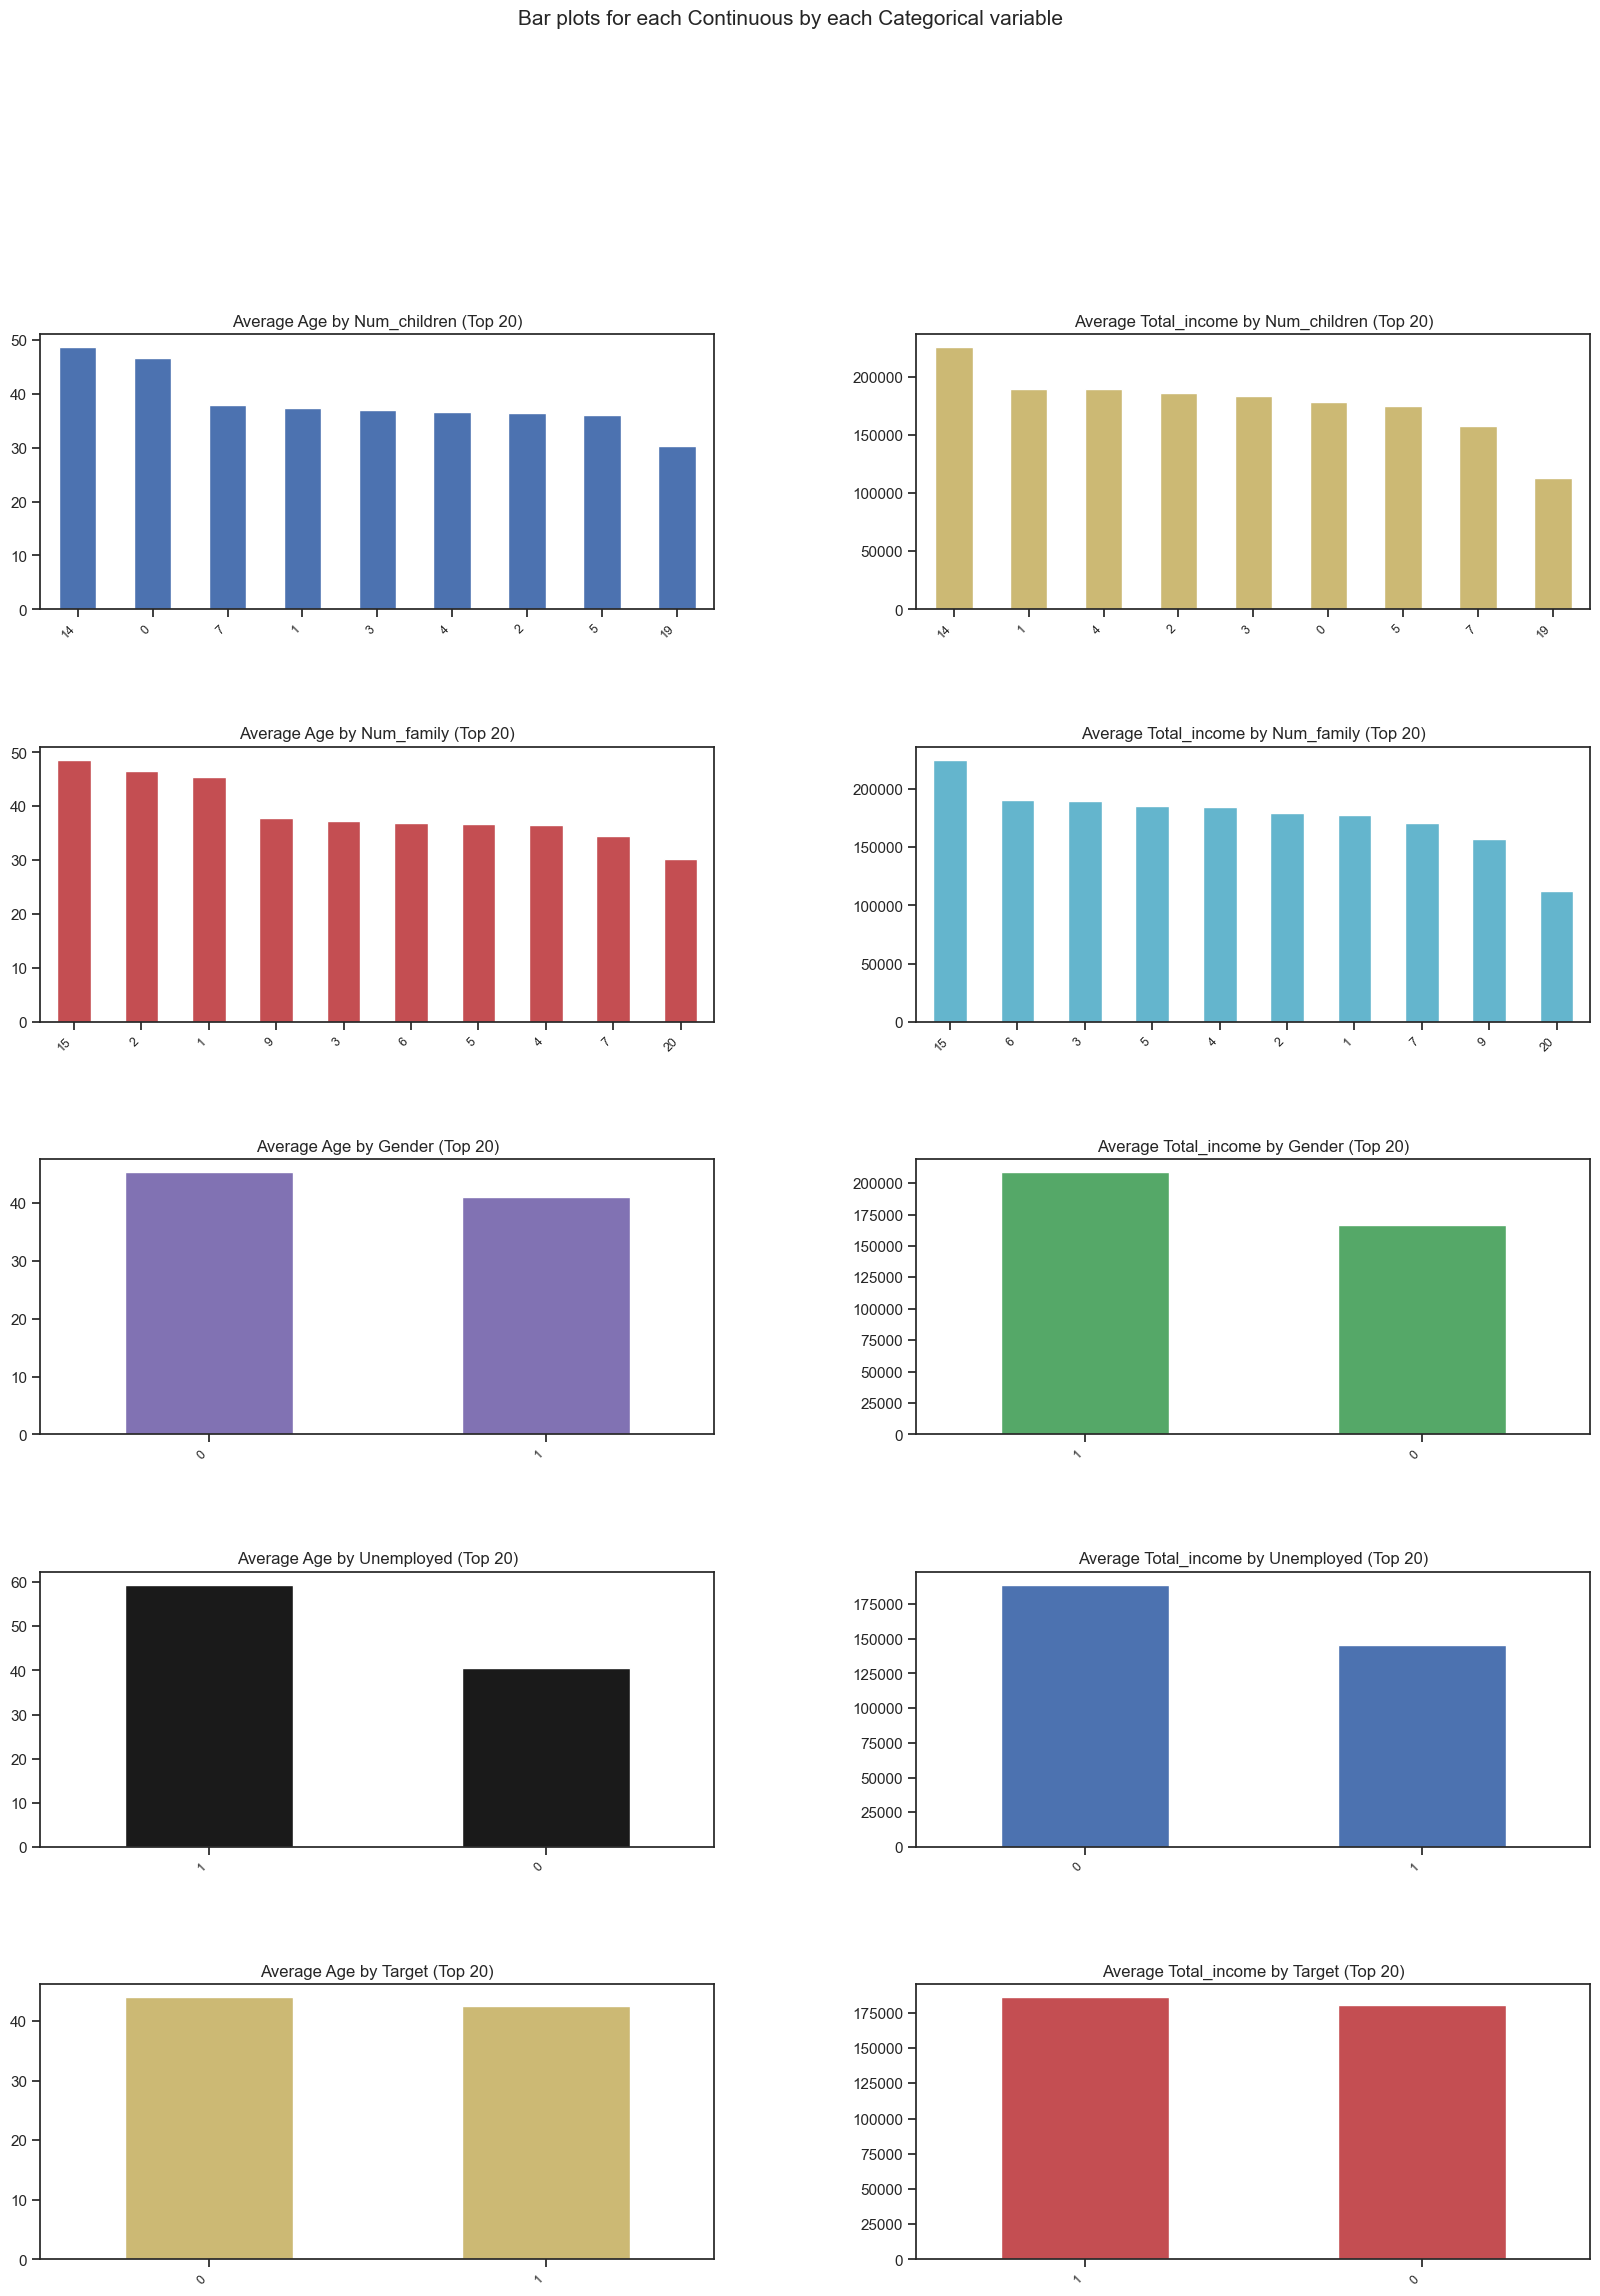

All Plots done
Time to run AutoViz = 2 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,Gender,Unemployed,Num_children,Num_family,Age,Total_income,Target
0,1,0,0,2,32.868574,427500.0,1
1,1,0,0,2,58.793815,112500.0,0
2,0,0,0,1,52.321403,270000.0,0
3,0,1,0,1,61.504343,283500.0,0
4,1,0,0,2,46.193967,270000.0,0
...,...,...,...,...,...,...,...
9704,0,0,0,2,56.400884,180000.0,1
9705,0,0,0,2,43.360233,112500.0,1
9706,1,0,0,2,52.296762,90000.0,1
9707,0,0,0,2,33.914454,157500.0,1


In [37]:
#Autoviz for selected columns only
import pandas as pd
from autoviz.AutoViz_Class import AutoViz_Class

# Load your dataset
#data = pd.read_csv('/kaggle/input/credit-card-eligibility-data-determining-factors/dataset.csv')
data = pd.read_csv('dataset.csv')

# Select columns of interest
columns_of_interest = ['Gender', 'Unemployed', 'Num_children', 'Num_family', 'Age','Total_income', 'Target']  # Replace with your desired column names

# Subset the data with selected columns
data_subset = data[columns_of_interest]

# Use AutoViz on the subset of data
AV = AutoViz_Class()
AV.AutoViz(data_subset)

In [10]:
df.describe()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Target
count,9.709000e+03,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9.709000e+03,9709.000000,9709.000000,9709.000000
mean,5.076105e+06,0.348749,0.367700,0.671542,0.217427,0.287671,0.087548,0.174683,0.422804,2.182614,27.270059,1.812282e+05,43.784093,5.664730,0.132145
std,4.080270e+04,0.476599,0.482204,0.469677,0.412517,0.452700,0.282650,0.379716,0.767019,0.932918,16.648057,9.927731e+04,11.625768,6.342241,0.338666
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.700000e+04,20.504186,0.000000,0.000000
25%,5.036955e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,13.000000,1.125000e+05,34.059563,0.928150,0.000000
50%,5.069449e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,26.000000,1.575000e+05,42.741466,3.761884,0.000000
75%,5.112986e+06,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,41.000000,2.250000e+05,53.567151,8.200031,0.000000
max,5.150479e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,20.000000,60.000000,1.575000e+06,68.863837,43.020733,1.000000


In [51]:
columns_to_encode = ["Income_type",
                     "Education_type",
                     "Family_status",
                     "Housing_type",
                     "Occupation_type"
                   ]

In [52]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of the label encoder
le = LabelEncoder()

# Copy df data
df_data_label_encoded = df.copy()

# Fit and transform the label encoder for each column
for column in columns_to_encode:
    df_data_label_encoded[column] = le.fit_transform(df_data_label_encoded[column])

df_data_label_encoded.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,4,1,0,4,12,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,4,4,1,1,17,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,0,4,3,1,15,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,1,1,2,1,12,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,4,1,1,1,0,0


In [53]:
df_data_label_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   int32  
 15  Education_type   9709 non-null   int32  
 16  Family_status    9709 non-null   int32  
 17  Housing_type  

Caegorical Variables : Income_type, Education_type,Family_status,                   Housing_type, Occupation_type

In [12]:
columns_to_encode = ["Income_type",
                     "Education_type",
                     "Family_status",
                     "Housing_type",
                     "Occupation_type"
                   ]

In [46]:
# from sklearn.preprocessing import OneHotEncoder

# # Set up the OneHotEncoder so it will transform to Pandas
# ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# ohe.set_output(transform="pandas")

# # Fit and transform the OneHotEncoder to the columns to encode
# data_ohe = ohe.fit_transform(df[columns_to_encode])
# data_ohe.head()

,Income_type_Commercial associate,Income_type_Pensioner,Income_type_State servant,Income_type_Student,Income_type_Working,Education_type_Academic degree,Education_type_Higher education,Education_type_Incomplete higher,Education_type_Lower secondary,Education_type_Secondary / secondary special,Family_status_Civil marriage,Family_status_Married,Family_status_Separated,Family_status_Single / not married,Family_status_Widow,Housing_type_Co-op apartment,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents,Occupation_type_Accountants,Occupation_type_Cleaning staff,Occupation_type_Cooking staff,Occupation_type_Core staff,Occupation_type_Drivers,Occupation_type_HR staff,Occupation_type_High skill tech staff,Occupation_type_IT staff,Occupation_type_Laborers,Occupation_type_Low-skill Laborers,Occupation_type_Managers,Occupation_type_Medicine staff,Occupation_type_Other,Occupation_type_Private service staff,Occupation_type_Realty agents,Occupation_type_Sales staff,Occupation_type_Secretaries,Occupation_type_Security staff,Occupation_type_Waiters/barmen staff
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
# Split into training and testing sets
X = df_data_label_encoded.drop(columns = 'Target')
y = df_data_label_encoded['Target'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

In [73]:
# Find the percentage of rows missing values in each column
X_train.isna().sum()/len(df)

ID                 0.0
Gender             0.0
Own_car            0.0
Own_property       0.0
Work_phone         0.0
Phone              0.0
Email              0.0
Unemployed         0.0
Num_children       0.0
Num_family         0.0
Account_length     0.0
Total_income       0.0
Age                0.0
Years_employed     0.0
Income_type        0.0
Education_type     0.0
Family_status      0.0
Housing_type       0.0
Occupation_type    0.0
dtype: float64

In [77]:
from sklearn.preprocessing import StandardScaler
# Scale the X data by using StandardScaler()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-1.30049107, -0.73638169, -0.76681442, ...,  2.6898122 ,
        -0.29672712,  0.65932671],
       [-1.038535  , -0.73638169, -0.76681442, ...,  1.65996929,
        -0.29672712,  1.36477238],
       [ 0.72988862,  1.35799139, -0.76681442, ..., -0.39971653,
        -0.29672712, -0.28126752],
       ...,
       [ 0.98475025, -0.73638169, -0.76681442, ..., -0.39971653,
        -0.29672712, -0.75156463],
       [-1.63674304, -0.73638169, -0.76681442, ...,  1.65996929,
        -0.29672712,  0.65932671],
       [-1.59958286, -0.73638169, -0.76681442, ..., -0.39971653,
        -0.29672712,  0.65932671]])

In [78]:
# Transform the test dataset based on the fit from the training dataset
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.95367083, -0.73638169,  1.30409649, ...,  1.65996929,
        -0.29672712,  0.65932671],
       [ 0.36951555,  1.35799139,  1.30409649, ..., -0.39971653,
        -0.29672712, -0.28126752],
       [-1.61316015,  1.35799139,  1.30409649, ..., -0.39971653,
        -0.29672712,  1.59992094],
       ...,
       [ 0.35469062, -0.73638169,  1.30409649, ..., -0.39971653,
        -0.29672712, -2.16245597],
       [-1.04528695, -0.73638169, -0.76681442, ..., -0.39971653,
        -0.29672712, -1.69215885],
       [ 0.70317438,  1.35799139,  1.30409649, ...,  1.65996929,
        -0.29672712, -0.28126752]])

In [69]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.preprocessing import StandardScaler
# # Create a StandardScaler() model and fit it to the training data
# X_scaler = StandardScaler().fit(X)

In [57]:
# # Transform the training and testing data by using the X_scaler model
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# # Loop through different k values to find which has the highest accuracy.
# # Note: We use only odd numbers because we don't want any ties.
# train_scores = []
# test_scores = []
# for k in range(1, 20, 2):
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_train_scaled, y_train)
#     train_score = knn.score(X_train_scaled, y_train)
#     test_score = knn.score(X_test_scaled, y_test)
#     train_scores.append(train_score)
#     test_scores.append(test_score)
#     print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# # Plot the results
# plt.plot(range(1, 20, 2), train_scores, marker='o', label="training scores")
# plt.plot(range(1, 20, 2), test_scores, marker="x", label="testing scores")
# plt.xlabel("k neighbors")
# plt.ylabel("accuracy score")
# plt.legend()
# plt.show()

In [ ]:
# # Choose the best k, and refit the KNN classifier by using that k value.
# # Note that k: 13 provides the best accuracy where the classifier starts to stablize
# knn = KNeighborsClassifier(n_neighbors=13)
# knn.fit(X_train_scaled, y_train)

# # Print the score for the test data.
# print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

## Model and Fit to a Logistic Regression Classifier

In [81]:
# Create the logistic regression classifier model with a random_state of 1
lr_model = LogisticRegression(random_state=1, max_iter=500)

# Fit the model to the training data
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500, random_state=1)

In [83]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {lr_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {lr_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.8729570113995331
Testing Data Score: 0.8525535420098846


In [103]:
# Make predictions on the test data
predictions_lr = lr_model.predict(X_test)

# Create a confusion matrix
print(confusion_matrix(y_test, predictions_lr, labels = [1,0]))

[[   0  358]
 [   0 2070]]


In [104]:
# Create a classification report
print("Linar Regression Classiciation Report")
print(classification_report(y_test, predictions_lr, labels = [1, 0]))

Linar Regression Classiciation Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       358
           0       0.85      1.00      0.92      2070

    accuracy                           0.85      2428
   macro avg       0.43      0.50      0.46      2428
weighted avg       0.73      0.85      0.78      2428



In [95]:
# Predict values with probabilities
pred_probas = lr_model.predict_proba(X_test)

# Print the probabilities
pred_probas

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [96]:
# Each prediction includes a prediction for both the 0 class and the 1 class
# We only need the predictions for the 1 class; use a list comprehension to 
# gather the second value from each list

pred_probas_firsts = [prob[1] for prob in pred_probas]

# Print the first 5 probabilities
pred_probas_firsts[0:5]

[0.0, 0.0, 0.0, 0.0, 0.0]

In [97]:
# Calculate the roc_auc_score
print(roc_auc_score(y_test, pred_probas_firsts))

0.5


## Model and Fit to a Support Vector Machine

In [98]:
# Create the support vector machine classifier model with a 'rbf' kernel
svm_model = SVC(kernel='rbf')

# Fit the model to the training data
svm_model.fit(X_train_scaled, y_train)

SVC()

In [100]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {svm_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {svm_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.873094355170993
Testing Data Score: 0.8525535420098846


In [105]:
# Make predictions on the test data
predictions_svm = svm_model.predict(X)

# Create a confusion matrix
print(confusion_matrix(y, predictions_svm, labels = [1,0]))

[[   0 1283]
 [   0 8426]]


In [106]:
# Create a classification report
print("Support Vector Machine Classiciation Report")
print(classification_report(y, predictions_svm, labels = [1, 0]))

Support Vector Machine Classiciation Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1283
           0       0.87      1.00      0.93      8426

    accuracy                           0.87      9709
   macro avg       0.43      0.50      0.46      9709
weighted avg       0.75      0.87      0.81      9709



## Model and Fit to a KNN Model

k: 1, Train/Test Score: 1.000/0.766
k: 3, Train/Test Score: 0.893/0.823
k: 5, Train/Test Score: 0.881/0.839
k: 7, Train/Test Score: 0.876/0.848
k: 9, Train/Test Score: 0.873/0.850
k: 11, Train/Test Score: 0.872/0.852
k: 13, Train/Test Score: 0.873/0.853
k: 15, Train/Test Score: 0.873/0.853
k: 17, Train/Test Score: 0.873/0.853
k: 19, Train/Test Score: 0.873/0.853


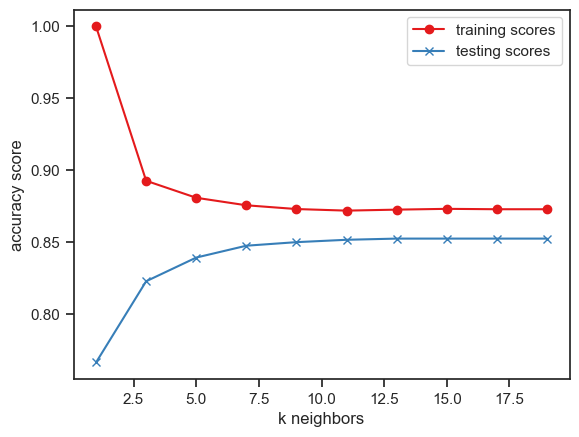

In [108]:
import matplotlib.pyplot as plt
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot the results
plt.plot(range(1, 20, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [115]:
# Create the KNN model with 13 neighbors
knn_model = KNeighborsClassifier(n_neighbors=13)

# Fit the model to the training data
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=13)

In [116]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {knn_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {knn_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.8726823238566132
Testing Data Score: 0.8525535420098846


In [121]:
# Make predictions on the test data
predictions_knn = knn_model.predict(X_test)

# Create a confusion matrix
print(confusion_matrix(y_test, predictions_knn, labels = [1,0]))

[[   0  358]
 [   0 2070]]


In [124]:
# Create a classification report
print("KNN Classiciation Report")
print(classification_report(y_test, predictions_knn, labels = [1, 0]))

KNN Classiciation Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       358
           0       0.85      1.00      0.92      2070

    accuracy                           0.85      2428
   macro avg       0.43      0.50      0.46      2428
weighted avg       0.73      0.85      0.78      2428



## Model and Fit to a Decision Tree Classifier

In [119]:
# Create the decision tree classifier model
dt_model = DecisionTreeClassifier()

# Fit the model to the training data
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [120]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {dt_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {dt_model.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.7561779242174629


In [123]:
# Make predictions on the test data
predictions_dt = dt_model.predict(X_test)

# Create a confusion matrix
print(confusion_matrix(y_test, predictions_dt, labels = [1,0]))

[[  76  282]
 [ 410 1660]]


In [125]:
# Create a classification report
print("Decision Tree Classiciation Report")
print(classification_report(y_test, predictions_dt, labels = [1, 0]))

Decision Tree Classiciation Report
              precision    recall  f1-score   support

           1       0.16      0.21      0.18       358
           0       0.85      0.80      0.83      2070

    accuracy                           0.71      2428
   macro avg       0.51      0.51      0.50      2428
weighted avg       0.75      0.71      0.73      2428

